# Airline Passenger Prediction with LSTM

The airline passenger prediction project with LSTM (Long Short-Term Memory) involves using historical data on airline passenger numbers to build a predictive model. The goal is to forecast future passenger numbers based on patterns and trends in the historical data.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Importing Dataset

In [2]:
dataframe = pd.read_csv('AirPassengers.csv')

# Data Investigation

Data investigation, also known as exploratory data analysis (EDA), is an essential step in any data analysis project. It involves examining and exploring the data to gain insights, understand its characteristics, identify patterns or anomalies, and make informed decisions about subsequent data processing and modeling.

In [3]:
dataframe.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataframe.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
dataframe.shape

(144, 2)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
dataframe.isna().sum().any()

False

In [8]:
dataframe.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
dataframe.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
dataframe = dataframe['#Passengers']
dataframe = np.array(dataframe).reshape(-1,1)

In [11]:
dataframe

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

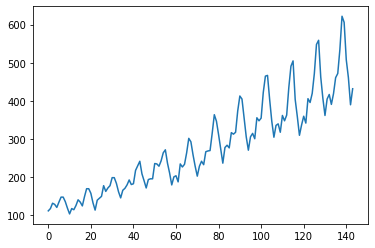

In [12]:
plt.plot(dataframe)

# Scaling Dataset

Scaling, also known as data normalization, is a preprocessing technique used to standardize the range and distribution of numerical variables in a dataset. It is an important step in data analysis and machine learning as it helps improve the performance and stability of models that rely on distance calculations or gradient-based optimization algorithms.

Min-Max scaling: This technique scales the data to a fixed range, typically between 0 and 1. It is calculated by subtracting the minimum value of the variable from each data point and then dividing by the range (maximum - minimum). Min-Max scaling maps the data to a specific range and is useful when you want to preserve the relationships between the variables' values

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
dataframe = scaler.fit_transform(dataframe)

In [16]:
dataframe

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Spliting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [17]:
train_size = 100
test_size = 44

In [18]:
train = dataframe[0:train_size,:]
test = dataframe[train_size:len(dataframe),:]

In [19]:
train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [20]:
test

array([[0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.63320463]])

In [21]:
def get_data(dataset,look_back):
    dataX , dataY =[] , []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [22]:
look_back = 1

In [23]:
x_train ,y_train = get_data(train,look_back)
x_test,y_test = get_data(test,look_back)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((98, 1), (42, 1), (98,), (42,))

In [25]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [26]:
x_train.shape, x_test.shape

((98, 1, 1), (42, 1, 1))

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [28]:
model = Sequential()
model.add(LSTM(5,input_shape = (1,look_back)))
model.add(Dense(1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [30]:
model.compile(loss='mean_squared_error',optimizer='adam')

# Fitting Model

Fitting a model refers to the process of training the model on a given dataset. This involves optimizing the model's parameters or coefficients to make accurate predictions or capture patterns in the data.

In [31]:
model.fit(x_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
98/98 [==============================] - 6s 5ms/step - loss: 0.0449
Epoch 2/50
98/98 [==============================] - 0s 5ms/step - loss: 0.0211
Epoch 3/50
98/98 [==============================] - 1s 5ms/step - loss: 0.0164
Epoch 4/50
98/98 [==============================] - 1s 5ms/step - loss: 0.0147
Epoch 5/50
98/98 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 6/50
98/98 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 7/50
98/98 [==============================] - 1s 5ms/step - loss: 0.0113
Epoch 8/50
98/98 [==============================] - 1s 6ms/step - loss: 0.0102
Epoch 9/50
98/98 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 10/50
98/98 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 11/50
98/98 [==============================] - 1s 7ms/step - loss: 0.0070
Epoch 12/50
98/98 [==============================] - 1s 6ms/step - loss: 0.0061
Epoch 13/50
98/98 [==============================

In [32]:
model.save('model_passanger_pred.h5')

# Learning Curve

The learning curve is a plot that shows how the loss and accuracy of a model change during training. It provides insights into how well the model is learning from the training data and how it generalizes to unseen data. The learning curve typically shows the training and validation loss/accuracy on the y-axis and the number of epochs on the x-axis. By analyzing the learning curve, you can identify if the model is overfitting (high training loss, low validation loss) or underfitting (high training and validation loss). It is a useful tool for monitoring and evaluating the performance of machine learning models.

In [34]:
loss = pd.DataFrame(model.history.history)

In [35]:
loss.head()

,loss
0,0.044932
1,0.021057
2,0.016374
3,0.014719
4,0.013604


<AxesSubplot:>

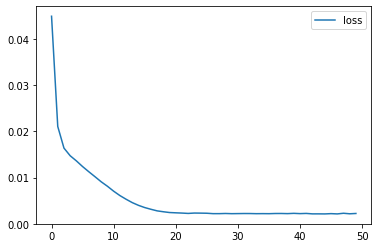

In [36]:
loss.plot()

# Prediction

In [37]:
y_pred = model.predict(x_test)

2/2 [==============================] - 2s 0s/step


In [38]:
y_pred

array([[0.48586994],
       [0.6174048 ],
       [0.7004674 ],
       [0.7042898 ],
       [0.5822323 ],
       [0.47011542],
       [0.3877345 ],
       [0.44847155],
       [0.4563386 ],
       [0.41314298],
       [0.49965885],
       [0.47208428],
       [0.50162864],
       [0.64267725],
       [0.74982166],
       [0.77607125],
       [0.5822323 ],
       [0.49374917],
       [0.397494  ],
       [0.45043787],
       [0.49571905],
       [0.4602737 ],
       [0.5861492 ],
       [0.5665461 ],
       [0.61350626],
       [0.7138277 ],
       [0.85507333],
       [0.87485766],
       [0.69664085],
       [0.58810693],
       [0.49965885],
       [0.584191  ],
       [0.60765374],
       [0.5567288 ],
       [0.61155605],
       [0.6928103 ],
       [0.7138277 ],
       [0.8314613 ],
       [0.9844906 ],
       [0.9572619 ],
       [0.78166413],
       [0.6928103 ]], dtype=float32)

In [39]:
y_pred = scaler.inverse_transform(y_pred)

In [40]:
y_pred

array([[355.68063],
       [423.8157 ],
       [466.84213],
       [468.8221 ],
       [405.59634],
       [347.5198 ],
       [304.84647],
       [336.3083 ],
       [340.3834 ],
       [318.0081 ],
       [362.82327],
       [348.53967],
       [363.84366],
       [436.90683],
       [492.40762],
       [506.0049 ],
       [405.59634],
       [359.76205],
       [309.9019 ],
       [337.3268 ],
       [360.78247],
       [342.42178],
       [407.6253 ],
       [397.4709 ],
       [421.79626],
       [473.7628 ],
       [546.928  ],
       [557.1763 ],
       [464.86   ],
       [408.6394 ],
       [362.82327],
       [406.61096],
       [418.76465],
       [392.38553],
       [420.78604],
       [462.87573],
       [473.7628 ],
       [534.69696],
       [613.9661 ],
       [599.86163],
       [508.90204],
       [462.87573]], dtype=float32)

In [41]:
y_test = np.array(y_test)

In [42]:
y_test

array([0.61389961, 0.6969112 , 0.7007722 , 0.57915058, 0.46911197,
       0.38803089, 0.44787645, 0.45559846, 0.41312741, 0.4980695 ,
       0.47104247, 0.5       , 0.63899614, 0.74710425, 0.77413127,
       0.57915058, 0.49227799, 0.3976834 , 0.44980695, 0.49420849,
       0.45945946, 0.58301158, 0.56370656, 0.61003861, 0.71042471,
       0.85714286, 0.87837838, 0.69305019, 0.58494208, 0.4980695 ,
       0.58108108, 0.6042471 , 0.55405405, 0.60810811, 0.68918919,
       0.71042471, 0.83204633, 1.        , 0.96911197, 0.77992278,
       0.68918919, 0.55212355])

In [43]:
y_test = y_test.reshape(-1,1)

In [44]:
y_test.shape

(42, 1)

In [45]:
y_test = scaler.inverse_transform(y_test)

In [46]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

# Prediction VS Actual Values

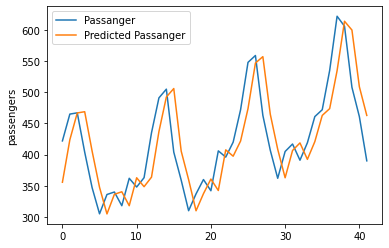

In [47]:
plt.plot(y_test, label = 'Passanger')
plt.plot(y_pred,label='Predicted Passanger')
plt.ylabel('passengers')
plt.legend()
plt.show()